# Transit duration vs Period

In [1]:
#We will use different planet and star masses values to produce 
#a duration of the transit versus period plot. 

import numpy as np
from astropy import constants as c
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rc('image', interpolation='nearest', origin='lower')

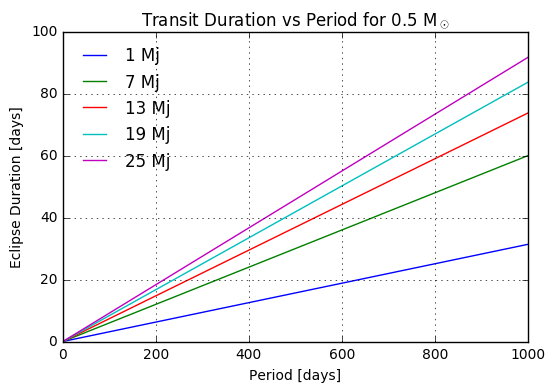

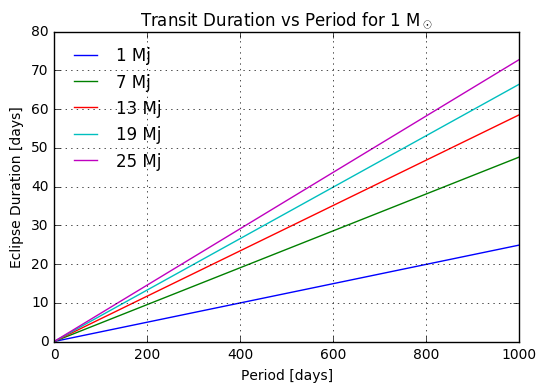

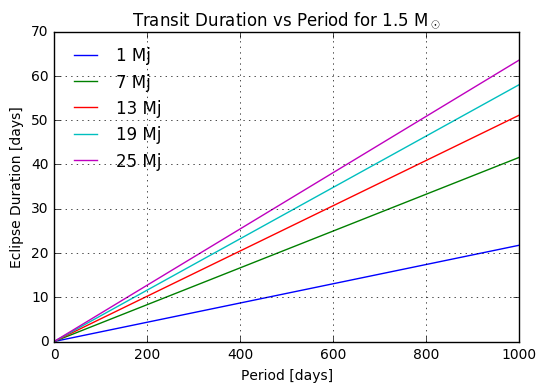

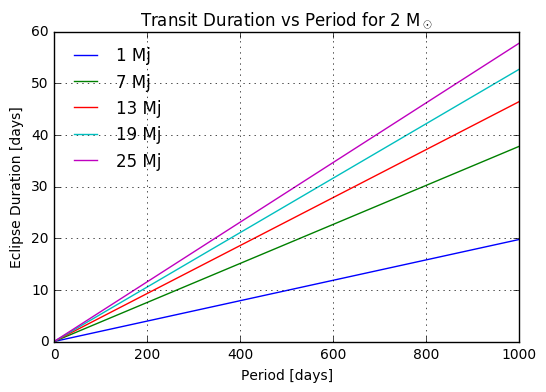

In [2]:
#Relation between duration of the transit and the orbital period
#Planet of mass m, star of mass M
#epsilon is the prograde stability criterion

def Eclipsing_Time(M, m, P, epsilon):
    return P * (epsilon / np.pi) * (m / (2.0*M))**(1.0/3.0)

Masses = c.GM_jup/c.GM_sun              #From jupiter mass to solar mass

epsilon     = 0.3                       #Quillen & Trilling, 1998
Period      = np.linspace(1, 1000, 100) #In days
Mass_star   = np.linspace(0.5, 2, 4)    #In solar mass
Planet_mass = np.linspace(1, 25, 5)     #In jupiter Mass

#print(Eclipsing_Time(1.6, 1.8*Masses, 808, 1))
for j in range(len(Mass_star)):
    plt.figure()
    for i in range(len(Planet_mass)):
        plt.plot(Period, Eclipsing_Time(Mass_star[j], Planet_mass[i]*Masses, Period, 1), '-', label = r'%g Mj'%(Planet_mass[i]))
    plt.legend(frameon = False, loc = 'best')
    plt.title(r'Transit Duration vs Period for %g M$_\odot$'%(Mass_star[j]))
    plt.xlabel('Period [days]')
    plt.ylabel('Eclipse Duration [days]')
    plt.grid()
    plt.savefig("Eclipse_Period_%d"%(j))
#plt.axhline(y = 21)

# Multi-Part Power Law IMF

In [7]:
# Using the definitions from Anthony's PDF
# This is the general case which can be used for single, two part, ... n part power law.

alpha = [0.3, 1.3, 2.3, 3]
mass  = [0.01, 0.08, 0.5, 1, 2]
#alpha = [-2.2, 1.5]                 #Power law
gamma = 1.0 - np.array(alpha)        #Re-written power law
#mass  = [2, 10, 20]                  #Mass ranges 

A_i = []                             #Vector Ai
B_i = [1.0]                          #Vector Bn, the first value is always 1.0
A   = []                             #A after multiplying Ai and Bn

for i in range(len(alpha)):

    A_const = (mass[i + 1]**gamma[i] - mass[i]**gamma[i]) / gamma[i]  #Constant Ai
    A_i.append(A_const)
    
    if i != 0:
        B_const = B_i[i-1]*mass[i]**(alpha[i] - alpha[i-1])           #Constant Bn
        B_i.append(B_const)
    
    A.append(A_i[i]*B_i[i])                                           #Constant A
        
A = np.sum(A)                                                         #Final normalisation constant 
AA = []                                                              #To be use as sum (AjBj)
M1 = []
M2 = []
XX = []
for j in range(len(alpha)):
    
    AA.append(A_i[j]*B_i[j])
    
    Xj = (A)**(-1)*np.sum(AA)                                         #xi = 1, 2, ..., n
    X0 = 0.0                                                          #First value of the random variable
    #print(X0, Xj, mass[j], mass[j+1])
    x  = np.random.uniform(X0, Xj, 100)                                 #Random variable uniform distributed
    
    for k i
    if (X0 < x) and (Xj > x):
        XX.append(x)
'''
    #The value of m is generated
    if (j == 0) and (X0 < x) and (Xj > x):
        m_1 = ( A*x*(gamma[j]/B_i[j]) + mass[j]**gamma[j] )**(1.0/gamma[j]) 
        M1.append(m_1)
    if (j != 0) and (X0 < x) and (Xj > x):
        m_2 = ( (A*x - (np.sum(AA) - AA[j]) ) *(gamma[j]/B_i[j]) + mass[j]**gamma[j] )**(1.0/gamma[j])
        M2.append(m_2)
        
    X0 = Xj   #Changing the lower limit for xi
M1.append(M2)    
plt.hist(M1, bins = 'auto')   '''     

"\n    #The value of m is generated\n    if (j == 0) and (X0 < x) and (Xj > x):\n        m_1 = ( A*x*(gamma[j]/B_i[j]) + mass[j]**gamma[j] )**(1.0/gamma[j]) \n        M1.append(m_1)\n    if (j != 0) and (X0 < x) and (Xj > x):\n        m_2 = ( (A*x - (np.sum(AA) - AA[j]) ) *(gamma[j]/B_i[j]) + mass[j]**gamma[j] )**(1.0/gamma[j])\n        M2.append(m_2)\n        \n    X0 = Xj   #Changing the lower limit for xi\nM1.append(M2)    \nplt.hist(M1, bins = 'auto')   "